# Richardson's Extrapolation

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def num_diff(f, x, h, method):
    if method == 'forward':
        return (f(x + h) - f(x)) / h
    elif method == 'central':
        return (f(x + h) - f(x - h)) / (2 * h)

def richardson_extrapolation(f, x, h):
    N_h = num_diff(f, x, h, method='central')
    N_2h = num_diff(f, x, 2*h, method='central')
    return (4 * N_h - N_2h) / 3

## Fourth order approximation

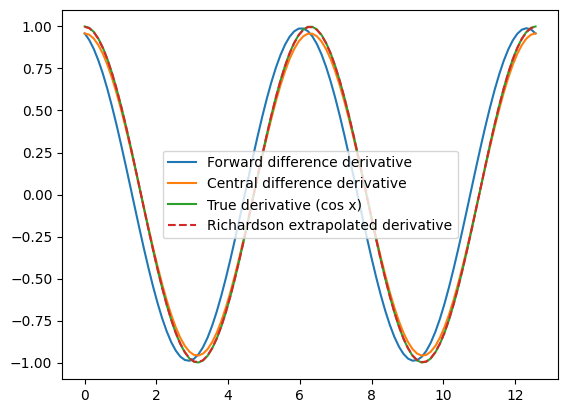

In [10]:
f = np.sin
x = np.linspace(0, 4*np.pi, 100)
h = 0.5
D_forward = num_diff(f, x, h, method='forward')
D_central = num_diff(f, x, h, method='central')
D_rich = richardson_extrapolation(f,x,h)
D_true = np.cos(x)
plt.plot(x, D_forward, label='Forward difference derivative')
plt.plot(x, D_central, label='Central difference derivative')
plt.plot(x, D_true, label='True derivative (cos x)')
plt.plot(x, D_rich, '--', label='Richardson extrapolated derivative')
plt.legend()
plt.show()

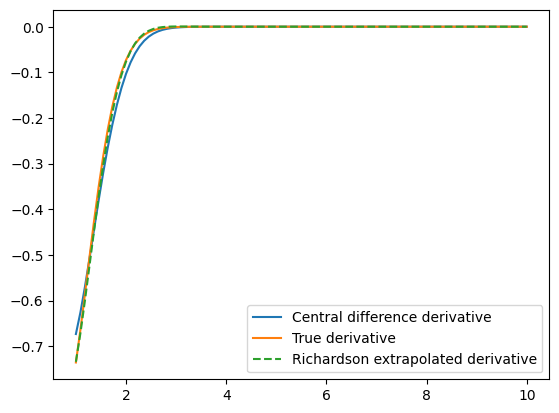

In [11]:
f = lambda x: np.exp(-x**2)
x = np.linspace(1, 10, 100)
h = 0.5
D_central = num_diff(f, x, h, method='central')
D_rich = richardson_extrapolation(f,x,h)
D_true = lambda x: -2*x*np.exp(-x**2)
plt.plot(x, D_central, label='Central difference derivative')
plt.plot(x, D_true(x), label='True derivative')
plt.plot(x, D_rich, '--', label='Richardson extrapolated derivative')
plt.legend()
plt.show()

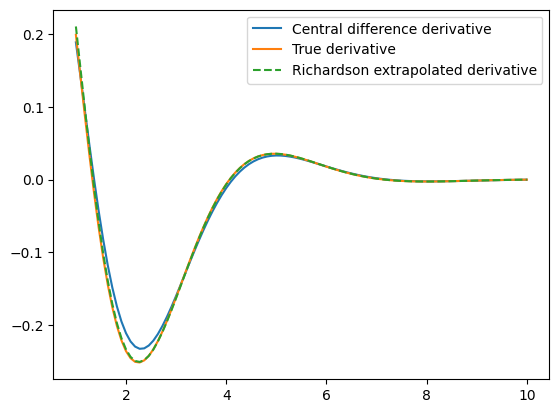

In [12]:
f = lambda x: x*np.exp(-x)*np.sin(x)
x = np.linspace(1, 10, 100)
h = 0.5
D_central = num_diff(f, x, h, method='central')
D_rich = richardson_extrapolation(f,x,h)
D_true = lambda x: np.exp(-x)*np.sin(x) + x*np.exp(-x)*np.cos(x) - x*np.exp(-x)*np.sin(x)
plt.plot(x, D_central, label='Central difference derivative')
plt.plot(x, D_true(x), label='True derivative')
plt.plot(x, D_rich, '--', label='Richardson extrapolated derivative')
plt.legend()
plt.show()

In [13]:

f = lambda x: x**2*np.exp(x)
x0 = 2
h = 0.1

# Compute derivatives
D_forward = num_diff(f, x0, h, method='forward')
D_central_2pt = num_diff(f, x0, h, method='central')
D_central_5pt = num_diff(f, x0, h=0.4, method='central')
D_rich = richardson_extrapolation(f, x0, h)
D_true = 8 * np.exp(2)  # derivative of x^2 * e^x

BOLD = "\033[1m"
GREEN = "\033[92m"

# Print results
print(f"x = {x0}")
print(f"Forward difference(h=0.1): {D_forward}")
print(f"Central difference (h=0.1): {D_central_2pt}")
print(f"Central difference (h=0.4): {D_central_5pt}")
print(f"Richardson extrapolation: {D_rich}")
print(f"{BOLD}{GREEN}True derivative: {GREEN}{D_true}")

x = 2
Forward difference(h=0.1): 64.56584918700742
Central difference (h=0.1): 59.38365188897592
Central difference (h=0.4): 63.51716618255516
Richardson extrapolation: 59.11136289149855
True derivative: 59.1124487914452


## Higher order approximation

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Exact derivative: -1.00000000
N0 (Richardson level 0): -0.95885108
N1 (Richardson level 1): -0.99797777
N2 (Richardson level 2): -0.99981551
N3 (Richardson level 3): -0.99996356


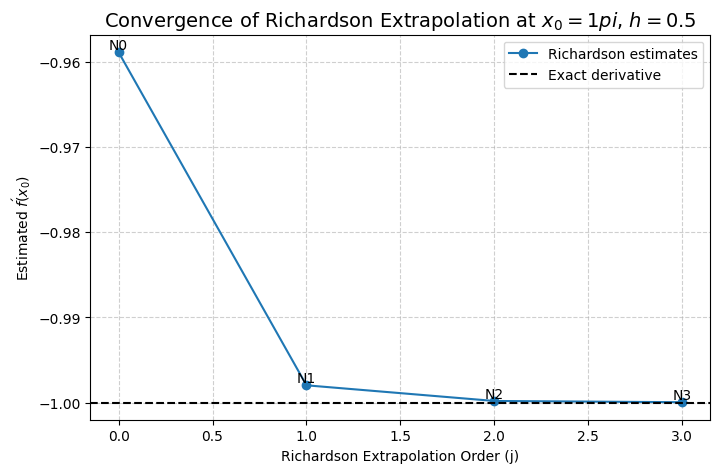

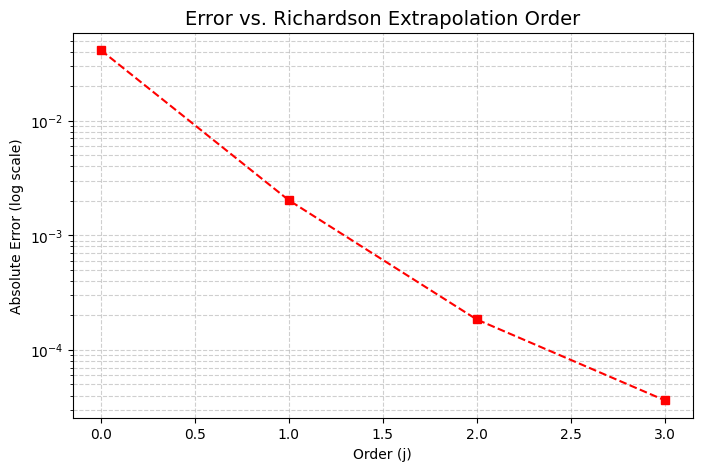

In [14]:
def richardson(f, x, h, levels):
    N = np.zeros((levels+1, levels+1))
    print(N)
    for i in range(levels+1):
        N[0, i] = num_diff(f, x, (2**i) * h, method='central')
    for j in range(1, levels+1):
        for i in range(levels+1-j):
            N[j, i] = (4**j * N[j-1, i] - N[j-1, i+1]) / (4**j - 1)
    return [N[j, 0] for j in range(levels+1)]

f = np.sin
x0 = np.pi
h = 0.5
levels = 3
exact = np.cos(x0)

N_values = richardson(f, x0, h, levels=3)

print(f"Exact derivative: {exact:.8f}")
for j, val in enumerate(N_values):
    print(f"N{j} (Richardson level {j}): {val:.8f}")

orders = np.arange(levels + 1)
values = N_values
errors = np.abs(np.array(values) - exact)


plt.figure(figsize=(8,5))
plt.plot(orders, values, 'o-', label='Richardson estimates')
plt.axhline(exact, color='k', linestyle='--', label='Exact derivative')
for i, v in enumerate(values):
    plt.text(orders[i], v, f'N{i}', fontsize=10, ha='center', va='bottom')
plt.title(r'Convergence of Richardson Extrapolation at $x_0 = 1pi$, $h = 0.5$', fontsize=14)
plt.xlabel('Richardson Extrapolation Order (j)')
plt.ylabel(r'Estimated $f\'(x_0)$')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.semilogy(orders, errors, 's--', color='red')
plt.title('Error vs. Richardson Extrapolation Order', fontsize=14)
plt.xlabel('Order (j)')
plt.ylabel('Absolute Error (log scale)')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.show()